# Newtonian Dynamics:

## Rectilinear motion in 1D:

### 1. At constant velocity (MRU):

$$x = v\,t$$

The purpose of the exercise is to generate data for x vs. t , and then compute numerically the velocity and acceleration.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a time vector
d_t0 = 0.01
t = np.arange(0,100, d_t0)

# Fix the velocity
v_0 = 3.

# Compute the x vector
x = v_0*t

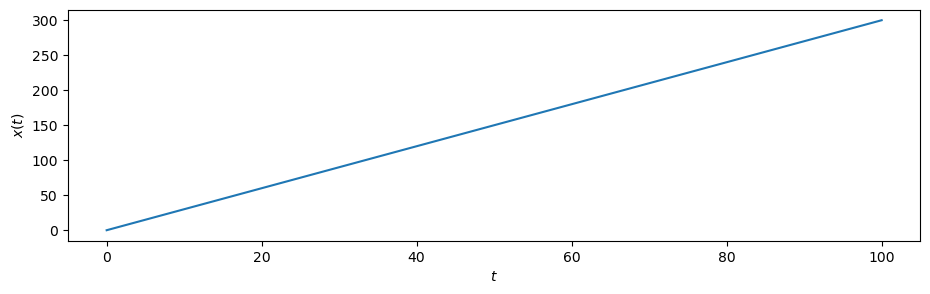

In [3]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, x)

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.show()

### Velocity

$$v_x=\frac{dx}{dt}$$

### Method 1: Finite Differences (1st order)

In [4]:
# Delta x and delta t
x_diff = np.diff(x)
t_diff = np.diff(t)

#print(x.shape, t.shape, x_diff.shape, t_diff.shape)

In [5]:
# Compute derivative
vx_dot = x_diff/t_diff

# Midpoints
t_mid = 0.5*(t[1:] + t[:-1])

#print(t[:5])
#print(t_mid[:5])
print(t_mid.shape, vx_dot.shape)

(9999,) (9999,)


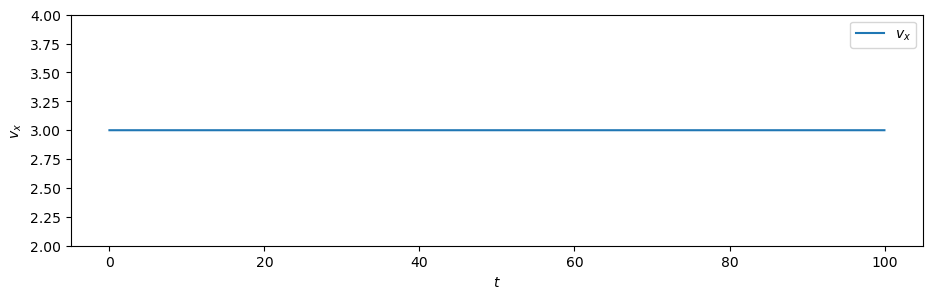

In [6]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t_mid, vx_dot, label = r"$v_x$")

plt.xlabel(r"$t$")
plt.ylabel(r"$v_x$")

plt.ylim(2, 4)
plt.legend()
plt.show()

### Method 2: Finite Differences (2nd order)


In [7]:
# Fix the time delta
dt = t[1] - t[0]
print(dt)

0.01


In [8]:
# Compute derivative (2nd order)
vx_dot2 = np.gradient(x, dt, axis = 0)

print(vx_dot2.shape)

(10000,)


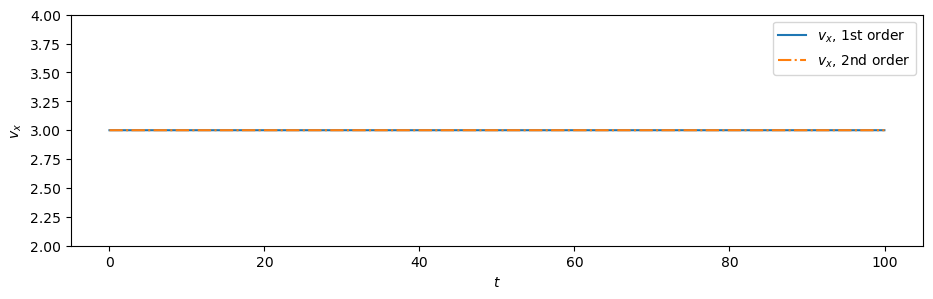

In [9]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t_mid, vx_dot, label = r"$v_x$, 1st order")
plt.plot(t, vx_dot2, label = r"$v_x$, 2nd order", linestyle = "-.")

plt.xlabel(r"$t$")
plt.ylabel(r"$v_x$")

plt.ylim(2, 4)
plt.legend()
plt.show()

# Error calculation:

$$\epsilon = abs(v_0 - v_{\rm numerical})$$

In [10]:
# Errors associated with both methods
e_1 = abs(v_0  - vx_dot)
e_2 = abs(v_0 - vx_dot2)


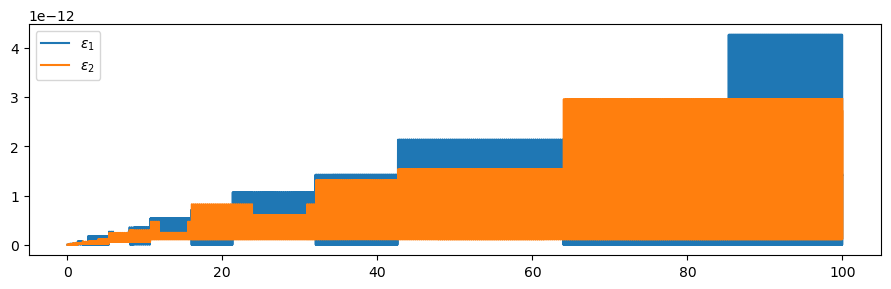

In [11]:
plt.figure(figsize=(11,3))

plt.plot(t_mid,e_1, label = r"$\epsilon_1$")
plt.plot(t, e_2, label = r"$\epsilon_2$")

plt.legend()

plt.show()

### Average $L_1$ errors:

In [12]:
e_1t = np.mean(e_1)
e_2t = np.mean(e_2)

print("The first order L1 error is:", e_1t)
print("The second order L1 error is:", e_2t)

The first order L1 error is: 8.212593854631211e-13
The second order L1 error is: 5.411542769451216e-13


### Acceleration

$$a_x=\frac{d^2x}{dt^2}$$

In [13]:
# Compute derivative (2nd order)
ax_dot2 = np.gradient(vx_dot2, dt, axis = 0)

print(ax_dot2.shape)

(10000,)


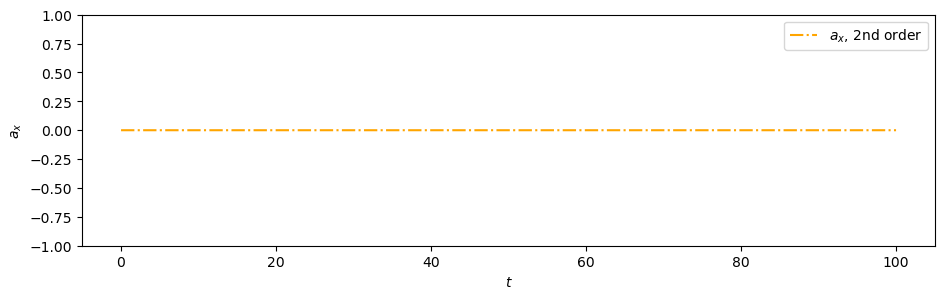

In [14]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, ax_dot2, label = r"$a_x$, 2nd order", linestyle = "-.", color = "orange")

plt.xlabel(r"$t$")
plt.ylabel(r"$a_x$")

plt.ylim(-1, 1)
plt.legend()
plt.show()

In [15]:
# Errors associated with both methods
a_0 = 0.
e_a1 = abs(a_0  - ax_dot2)

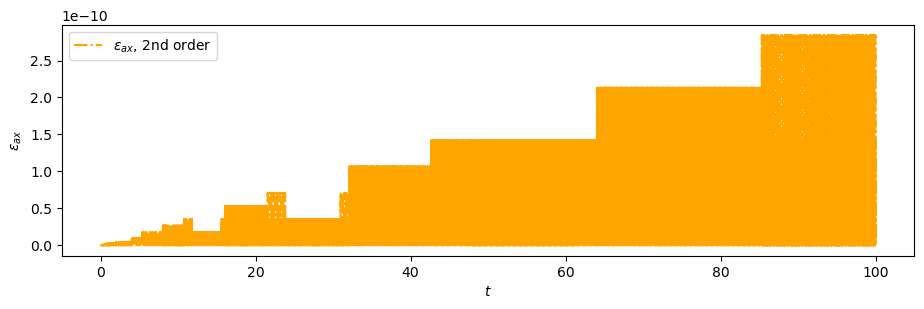

In [16]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, e_a1, label = r"$\epsilon_{ax}$, 2nd order", linestyle = "-.", color = "orange")

plt.xlabel(r"$t$")
plt.ylabel(r"$\epsilon_{ax}$")

#plt.ylim(-1, 1)
plt.legend()
plt.show()

In [17]:
e_a2t = np.mean(e_a1)

print("The second order L1 error in acceleration is:", e_a2t)

The second order L1 error in acceleration is: 4.4720254166463745e-11


### At constant acceleration (MRUV):

$$x = \frac{1}{2}a\,t^2$$

The purpose of the exercise is to generate data for x vs. t , and then compute numerically the velocity and acceleration.

In [18]:
# Generate a time vector
#d_t0 = 0.01
t = np.linspace(0,10, 1000)
d_t0 = t[1] - t[0]

# Fix acceleration
a_0 = 8.
    
# Compute the x vector
x_acc = 0.5*a_0*t**2

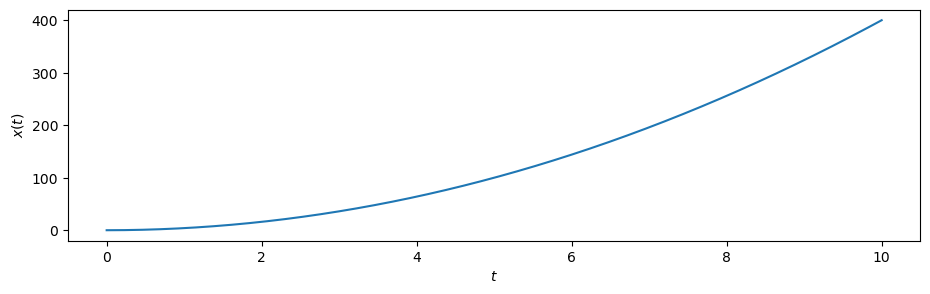

In [19]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, x_acc)

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.show()

In [20]:
# Compute derivative (2nd order)
vx_acc = np.gradient(x_acc, d_t0, axis = 0, edge_order = 2)

print(vx_acc.shape)

(1000,)


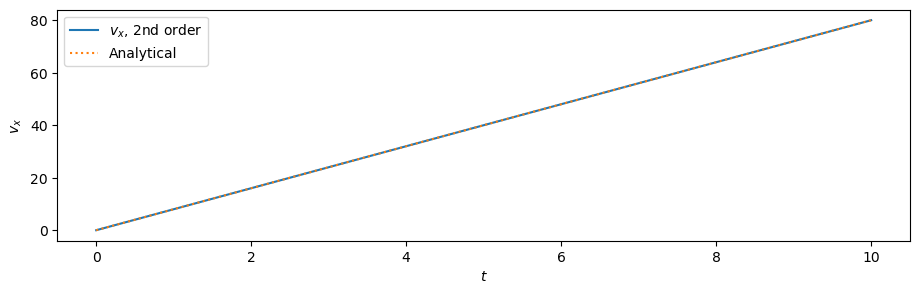

In [21]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, vx_acc, label = r"$v_x$, 2nd order", linestyle = "-")
plt.plot(t, 8*t, label = "Analytical", linestyle = ":")

plt.xlabel(r"$t$")
plt.ylabel(r"$v_x$")

#plt.ylim(2, 4)
plt.legend()
plt.show()

In [22]:
print(dt, d_t0)

0.01 0.01001001001001001


In [23]:
#print(vx_acc, vx_acc.shape)
#print(t, t.shape)
#print(np.diff(t))

In [24]:
# Compute derivative (2nd order)
ax_acc = np.gradient(vx_acc, d_t0, axis = 0, edge_order = 2)

#ax_acc = np.diff(vx_acc)/np.diff(t)

print(ax_acc.shape)

(1000,)


In [25]:
#print(ax_acc )

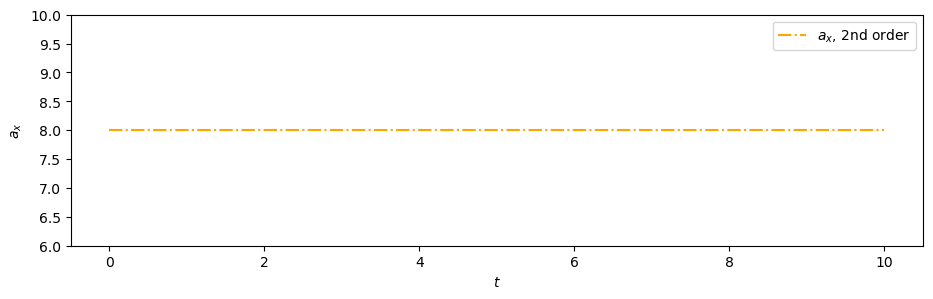

In [26]:
# Figure environment

plt.figure(figsize=(11,3))

plt.plot(t, ax_acc, label = r"$a_x$, 2nd order", linestyle = "-.", color = "orange")

plt.xlabel(r"$t$")
plt.ylabel(r"$a_x$")

plt.ylim(6, 10)
plt.legend()
plt.show()